In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Assuming df is your original DataFrame

# Define the features for clustering
X_0 = df.copy()

# Creating a pipeline for KMeans
kmeans_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # StandardScaler
    ('kmeans', KMeans(init='k-means++', random_state=42))
])

# Elbow Method for optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans_pipeline.set_params(kmeans__n_clusters=i)
    kmeans_pipeline.fit(X_0)
    wcss.append(kmeans_pipeline.named_steps['kmeans'].inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(16, 8))
plt.plot(range(1, 11), wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Training the K-Means model with the optimal number of clusters (k=2)
kmeans_pipeline.set_params(kmeans__n_clusters=2)
kmeans_pipeline.fit(X_0)
pred = kmeans_pipeline.named_steps['kmeans'].predict(X_0)

# Appending the cluster values to the DataFrame
X_0['cluster_Kmeans'] = pred + 1  # Adding 1 to avoid cluster 0
print(X_0.head())

# Visualizing the distribution of clusters
sns.countplot(x=X_0["cluster_Kmeans"])
plt.title("Distribution Of The Clusters")
plt.show()

# Scatter plot of the clusters
sns.scatterplot(x=X_0['Expenses'], y=X_0['Income'], hue=X_0['cluster_Kmeans'])
plt.title("Scatter Plot of Clusters")
plt.show()

# PCA for Dimensionality Reduction
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # StandardScaler
    ('pca', PCA(n_components=3))
])

PCA_ds = pd.DataFrame(pca_pipeline.fit_transform(X_0.drop(columns=['cluster_Kmeans'])), columns=["col1", "col2", "col3"])

# Describing the new DataFrame with reduced dimensions
print(PCA_ds.describe().T)

# 3D Projection of the PCA-transformed data
x = PCA_ds["col1"]
y = PCA_ds["col2"]
z = PCA_ds["col3"]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, c="maroon", marker="o")
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# Elbow Method on PCA-transformed data
wcss = []
for i in range(1, 11):
    kmeans_pipeline.set_params(kmeans__n_clusters=i)
    kmeans_pipeline.fit(PCA_ds)
    wcss.append(kmeans_pipeline.named_steps['kmeans'].inertia_)

plt.figure(figsize=(16, 8))
plt.plot(range(1, 11), wcss, 'bx-')
plt.title('The Elbow Method on PCA-transformed Data')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Using Agglomerative Clustering on PCA-transformed data
agglo_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # StandardScaler
    ('pca', PCA(n_components=3)),
    ('agglo', AgglomerativeClustering(n_clusters=2))
])

agglo_pipeline.fit(X_0)
PCA_ds["Clusters"] = agglo_pipeline.named_steps['agglo'].fit_predict(PCA_ds)

# Adding the Clusters feature to the original DataFrame
X_1 = X_0.copy()
X_1["Cluster_Agglo"] = PCA_ds["Clusters"] + 1

# Scatter plots of the clusters
sns.scatterplot(x=X_1['Expenses'], y=X_1['Income'], hue=X_1['Cluster_Agglo'])
plt.show()

sns.scatterplot(x=X_1['Kids'], y=X_1['Income'], hue=X_1['Cluster_Agglo'])
plt.show()

sns.scatterplot(x=X_1['Marital_Status'], y=X_1['Income'], hue=X_1['Cluster_Agglo'])
plt.show()

sns.scatterplot(x=X_1['Marital_Status'], y=X_1['Expenses'], hue=X_1['Cluster_Agglo'])
plt.show()

sns.scatterplot(x=X_1['Income'], y=X_1['Customer_Age'], hue=X_1['Cluster_Agglo'])
plt.show()

sns.countplot(x=X_1["Cluster_Agglo"])
plt.title("Distribution Of The Clusters")
plt.show()

# Plotting the clusters in 3D
fig = plt.figure(figsize=(16, 14))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o')
ax.set_title("The Plot Of The Clusters")
plt.show()

# Conclusions
print("Cluster 1: People with less expenses, who are married and parents of more than 3 kids, with low income.")
print("Cluster 2: People with more expenses, who are single or parents with less than 3 kids, with high income. Age is not a strict criterion but older people tend to fall in this group.")


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
import pandas as pd

# Set the file path
file_path = r'D:\Customer Personality Analysis\notebooks\data\eda_results.csv'

# Verify the file exists
if os.path.isfile(file_path):
    # Load the CSV file
    df = pd.read_csv(file_path)
    print(df.head())
else:
    print(f"File {file_path} not found. Please check the file path.")


   Education  Marital_Status    Income      Kids  Expenses  TotalAcceptedCmp  \
0          0               1  0.288947 -1.264308  1.767671         -0.438933   
1          0               1 -0.262003  1.395139 -0.959075         -0.438933   
2          0               0  0.918423 -1.264308  0.406743         -0.438933   
3          0               0 -1.182183  0.065416 -0.906920         -0.438933   
4          0               0  0.296187  0.065416 -0.285945         -0.438933   

   NumTotalPurchases  Customer_Age  Customer_For  
0           1.319340      1.016868      1.529793  
1          -1.155857      1.273264     -1.191143  
2           0.798246      0.333146     -0.206659  
3          -0.895310     -1.290693     -1.062517  
4           0.537699     -1.034298     -0.953679  


In [4]:
df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For
0,0,1,0.288947,-1.264308,1.767671,-0.438933,1.319340,1.016868,1.529793
1,0,1,-0.262003,1.395139,-0.959075,-0.438933,-1.155857,1.273264,-1.191143
2,0,0,0.918423,-1.264308,0.406743,-0.438933,0.798246,0.333146,-0.206659
3,0,0,-1.182183,0.065416,-0.906920,-0.438933,-0.895310,-1.290693,-1.062517
4,0,0,0.296187,0.065416,-0.285945,-0.438933,0.537699,-1.034298,-0.953679


In [5]:
# Creating a pipeline for KMeans
kmeans_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # StandardScaler
    ('kmeans', KMeans(init='k-means++', random_state=42))
])

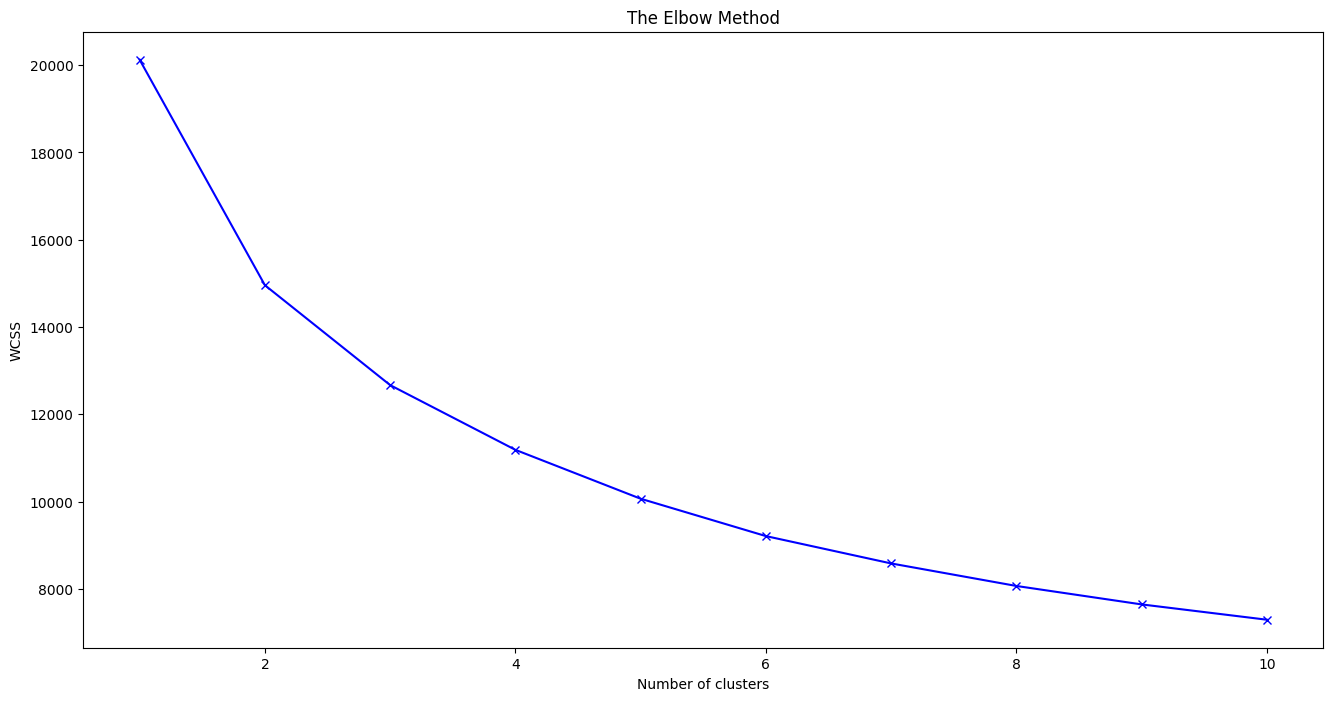

In [6]:
# Elbow Method for optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans_pipeline.set_params(kmeans__n_clusters=i)
    kmeans_pipeline.fit(df)
    wcss.append(kmeans_pipeline.named_steps['kmeans'].inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### We can understand from the plot that cluster = 2 is the best...

In [7]:
# Training the K-Means model with the optimal number of clusters (k=2)
kmeans_pipeline.set_params(kmeans__n_clusters=2)
kmeans_pipeline.fit(df)
pred = kmeans_pipeline.named_steps['kmeans'].predict(df)

In [8]:
# Appending the cluster values to the DataFrame
df['cluster_Kmeans'] = pred + 1  # Adding 1 to avoid cluster 0
print(df.head())


   Education  Marital_Status    Income      Kids  Expenses  TotalAcceptedCmp  \
0          0               1  0.288947 -1.264308  1.767671         -0.438933   
1          0               1 -0.262003  1.395139 -0.959075         -0.438933   
2          0               0  0.918423 -1.264308  0.406743         -0.438933   
3          0               0 -1.182183  0.065416 -0.906920         -0.438933   
4          0               0  0.296187  0.065416 -0.285945         -0.438933   

   NumTotalPurchases  Customer_Age  Customer_For  cluster_Kmeans  
0           1.319340      1.016868      1.529793               2  
1          -1.155857      1.273264     -1.191143               1  
2           0.798246      0.333146     -0.206659               2  
3          -0.895310     -1.290693     -1.062517               1  
4           0.537699     -1.034298     -0.953679               1  


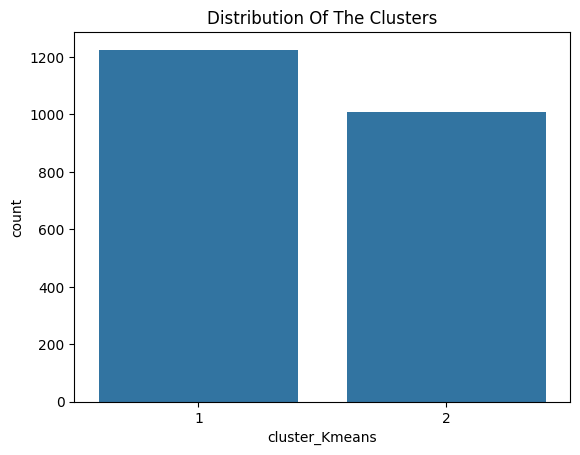

In [9]:
# Visualizing the distribution of clusters
sns.countplot(x=df["cluster_Kmeans"])
plt.title("Distribution Of The Clusters")
plt.show()

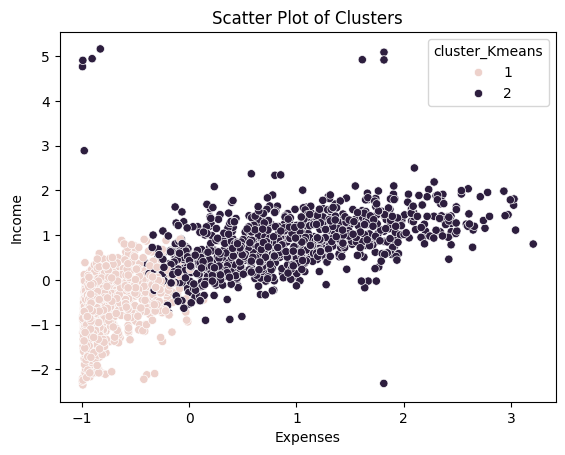

In [10]:
# Scatter plot of the clusters
sns.scatterplot(x=df['Expenses'], y=df['Income'], hue=df['cluster_Kmeans'])
plt.title("Scatter Plot of Clusters")
plt.show()


### PCA with Agglomerative clustering
#### PCA for dimensionality reduction

In [11]:
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # StandardScaler
    ('pca', PCA(n_components=3))
])
PCA_ds = pd.DataFrame(pca_pipeline.fit_transform(df.drop(columns=['cluster_Kmeans'])), columns=["col1", "col2", "col3"])


In [12]:
# Describing the new DataFrame with reduced dimensions
print(PCA_ds.describe().T)

       count          mean       std       min       25%       50%       75%  \
col1  2236.0 -2.859966e-17  1.736856 -3.197396 -1.589627 -0.229734  1.393510   
col2  2236.0 -7.388246e-17  1.114154 -2.911967 -0.720173 -0.098393  0.513866   
col3  2236.0 -7.467690e-17  1.036915 -2.432998 -0.823150  0.011495  0.846272   

           max  
col1  5.609298  
col2  5.690771  
col3  3.403872  


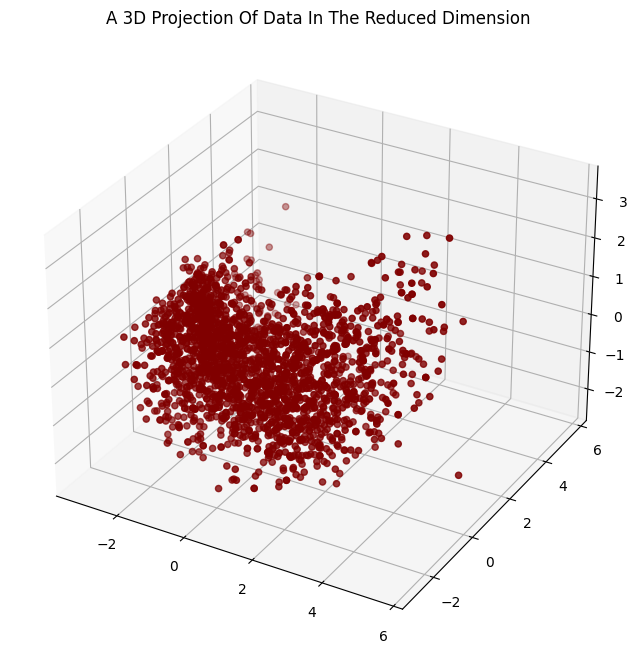

In [13]:
# 3D Projection of the PCA-transformed data
x = PCA_ds["col1"]
y = PCA_ds["col2"]
z = PCA_ds["col3"]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, c="maroon", marker="o")
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

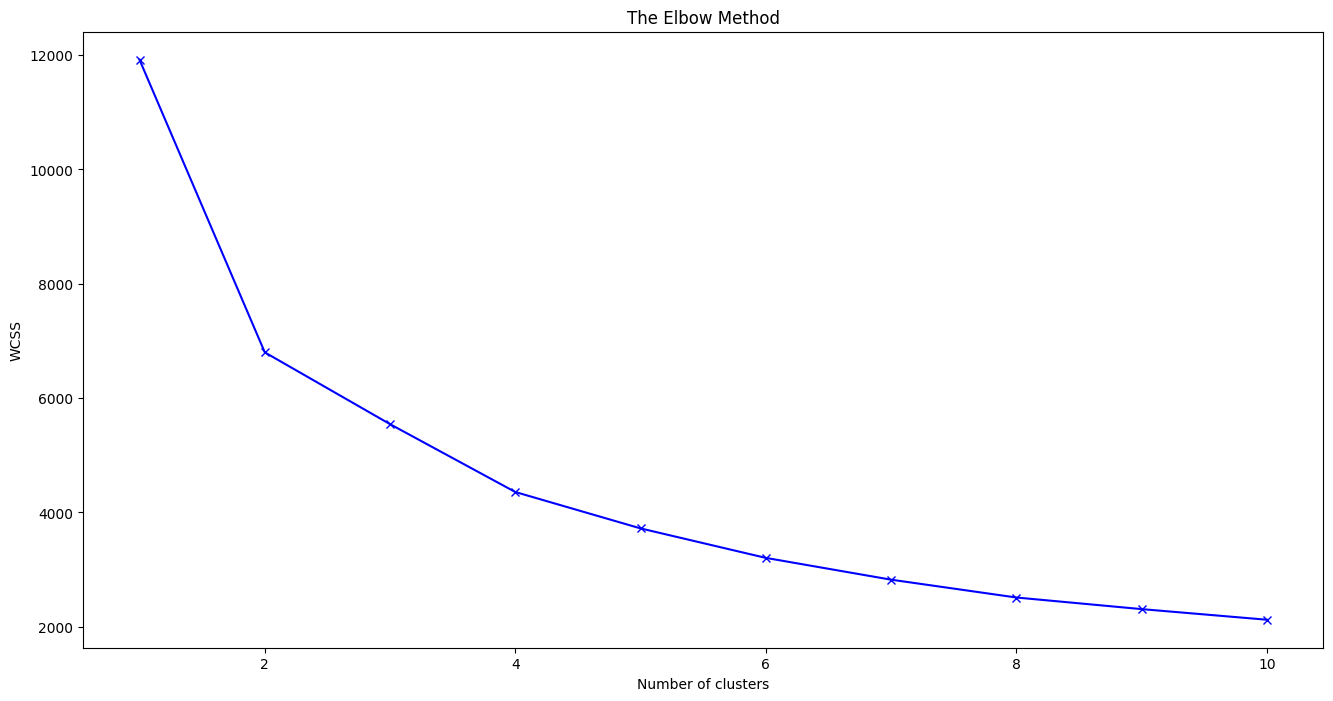

In [14]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(PCA_ds)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### WCSS is the sum of the squared distance between each point and the centroid in a cluster.

#### wcss values is more less for k=2 here...so we take k=2

In [15]:
# Using Agglomerative Clustering on PCA-transformed data
agglo_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # StandardScaler
    ('pca', PCA(n_components=3)),
    ('agglo', AgglomerativeClustering(n_clusters=2))
])
agglo_pipeline.fit(df)
PCA_ds["Clusters"] = agglo_pipeline.named_steps['agglo'].fit_predict(PCA_ds)

In [16]:
# Adding the Clusters feature to the original DataFrame
X_1 = df.copy()
X_1["Cluster_Agglo"] = PCA_ds["Clusters"] + 1

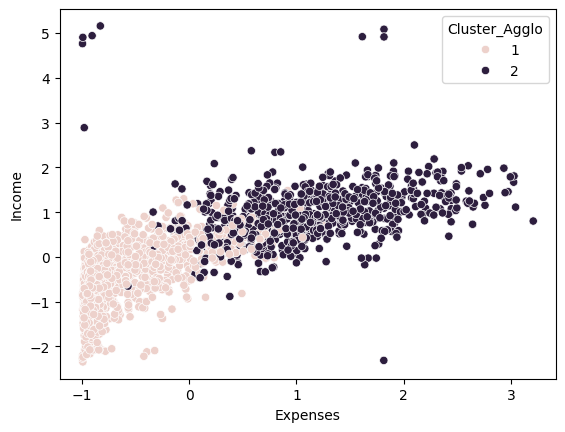

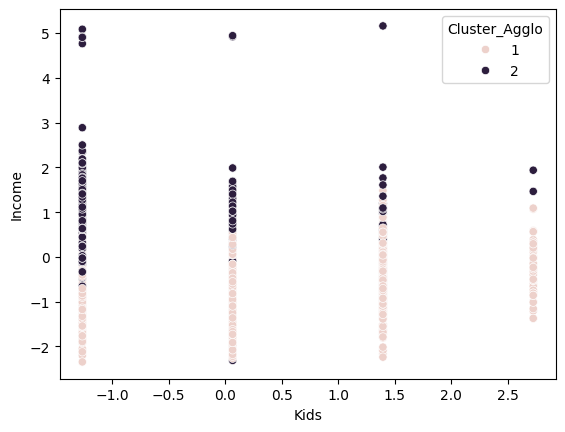

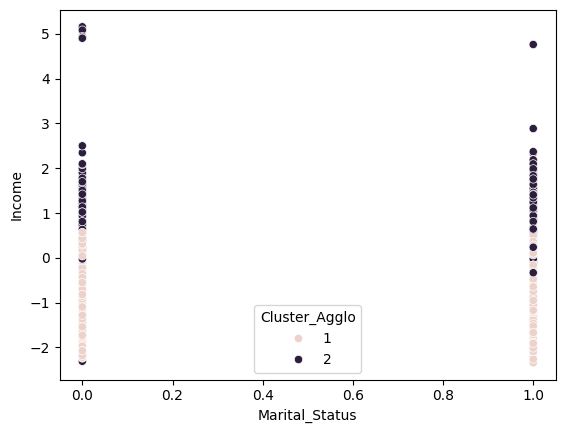

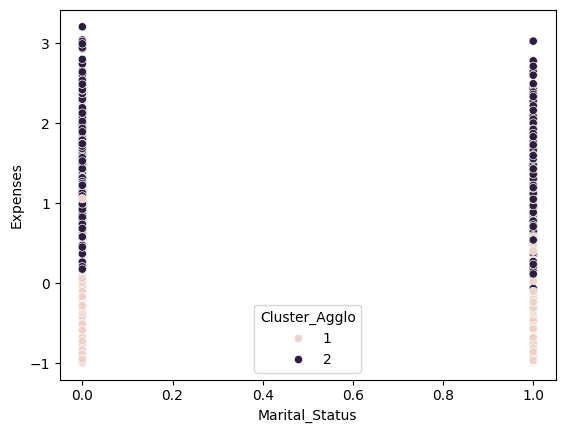

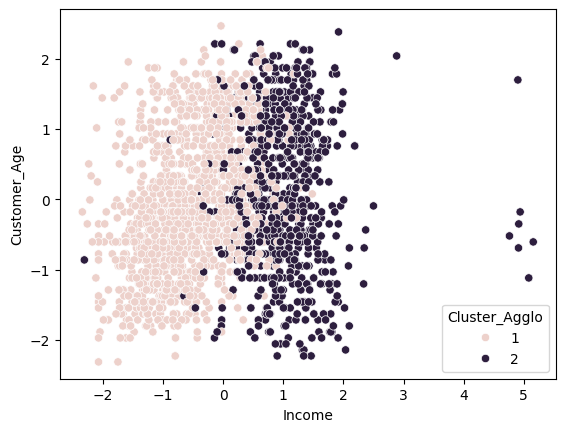

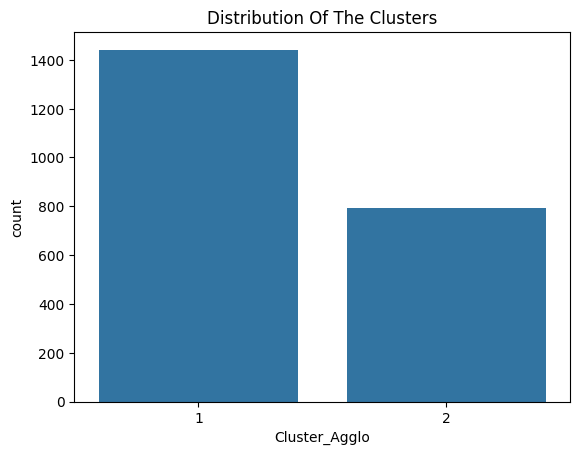

In [17]:
# Scatter plots of the clusters
sns.scatterplot(x=X_1['Expenses'], y=X_1['Income'], hue=X_1['Cluster_Agglo'])
plt.show()

sns.scatterplot(x=X_1['Kids'], y=X_1['Income'], hue=X_1['Cluster_Agglo'])
plt.show()

sns.scatterplot(x=X_1['Marital_Status'], y=X_1['Income'], hue=X_1['Cluster_Agglo'])
plt.show()

sns.scatterplot(x=X_1['Marital_Status'], y=X_1['Expenses'], hue=X_1['Cluster_Agglo'])
plt.show()

sns.scatterplot(x=X_1['Income'], y=X_1['Customer_Age'], hue=X_1['Cluster_Agglo'])
plt.show()

sns.countplot(x=X_1["Cluster_Agglo"])
plt.title("Distribution Of The Clusters")
plt.show()

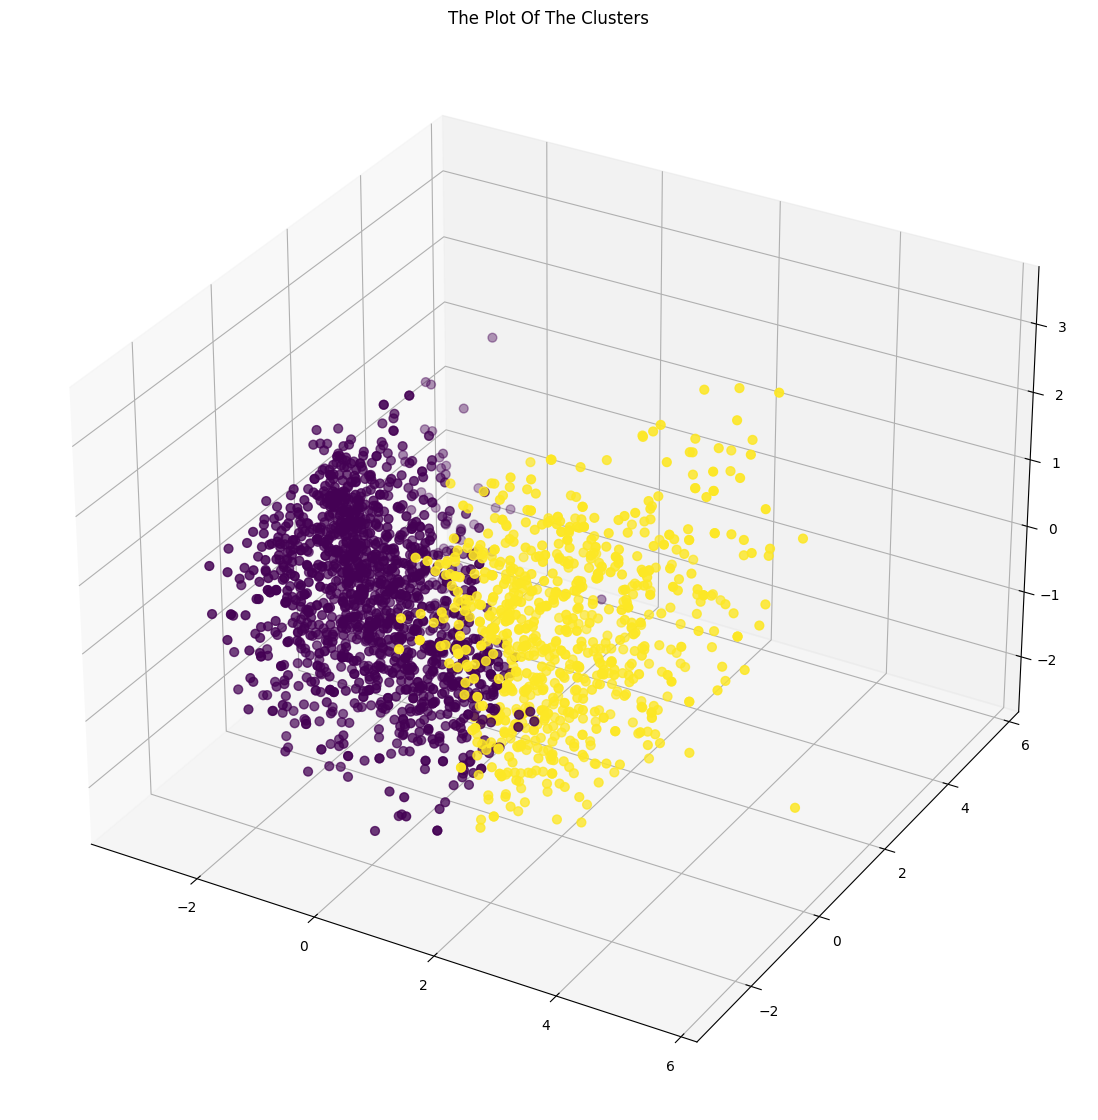

In [18]:
# Plotting the clusters in 3D
fig = plt.figure(figsize=(16, 14))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o')
ax.set_title("The Plot Of The Clusters")
plt.show()

## Conclusions

### Cluster 1:
People with less expenses

people who are married and parents of more than 3 kids

people with low income


-------------------------------------------------------------------------
-------------------------------------------------------------------------

### Cluster 2:
people with more expenses

people who are single or parents who have less than 3 kids

people with high income

Age is not the criteria but it is observed to some extent that people who are older fall in this group
